## Data Summary
The provided diamonds data set provides data of over 50,000 round cut diamonds. The data set contains 53940 observations/use cases, where each row consists of a diamond with 10 attributes. There is 1 dependent variable (price of the diamond) and 9 independent variables. Additionally, the categorical variables include cut, color, and clarity while the numerical variables include carat, x, y, z, depth, table, and price. The 10 attributes are as described below:
- **Carat**: Refers to the weight of the diamond. It's in the range of 0.2 - 5.01 and is represented as a float data type.
- **Cut**: Refers to the quality of the diamond cut. It can be assigned a string value of either Fair, Good, Very Good, Premium, and Ideal. Also, it's represented as a object data type.
- **Color**: Refers to the color of the diamond ranging from D (colorless/best) to J (near colorless/worst). It's represented as a object data type as well.
- **Clarity**: Measures how clear a diamond is, specifically the relative absence of irregularities and inclusions. It can take up the rating of I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, and IF (best). In the dataset, it's represented as a object data type specifying the string rating.
- **x**: Length of diamond in the range of 0mm - 10.74mm. It's represented as a float data type.
- **y**: Width of diamond in the range of 0mm - 58.9mm. It's represented as a float data type.
- **z**: Depth of diamond in the range of 0mm - 31.8mm. It's represented as a float data type.
- **Depth**: Refers to the diamond's total depth percentage. It plays a huge role in determining a diamond's brilliance. It's represented as a float data type in the range of 43-79 and modeled by the formula: $ \text{Total Depth Percentage} = \frac{z}{\text{mean}(x, y)} = \frac{2z}{x + y} $.
- **Table**: Refers to the large, flat facet on top of the diamond. It's represented as a float data type and its values are in the range of 43-95.
- **Price**: Refers to the price of the diamond in US dollars in the range of 326 USD - 18,823 USD and represented as a float data type.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/Anthony-Jerez/CS-Uploading-and-Processing-Data/refs/heads/main/diamonds.csv')
print(df.shape) # observations, attributes
print(df.dtypes)
df.head()

(53940, 11)
Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Exploratory Data Analysis


In [ ]:
# remove the unnamed column that serves no purpose
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# check for null values
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


No null values are present so no imputation or dropping is required.

In [ ]:
invalid_dimensions = df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]
print(len(invalid_dimensions))
df = df.drop(invalid_dimensions.index)
df.shape

20


(53920, 10)

Since there are only 20 diamonds with invalid dimensions (having a dimension of 0), we can drop them since they only make up a very small percentage of the data set.

In [ ]:
df.describe(include='all') # provides a summary of statistics for each attribute

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53920.000000,53920,53920,53920,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21548,11284,13063,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797698,NaN,NaN,NaN,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,NaN,NaN,NaN,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000


### Carat

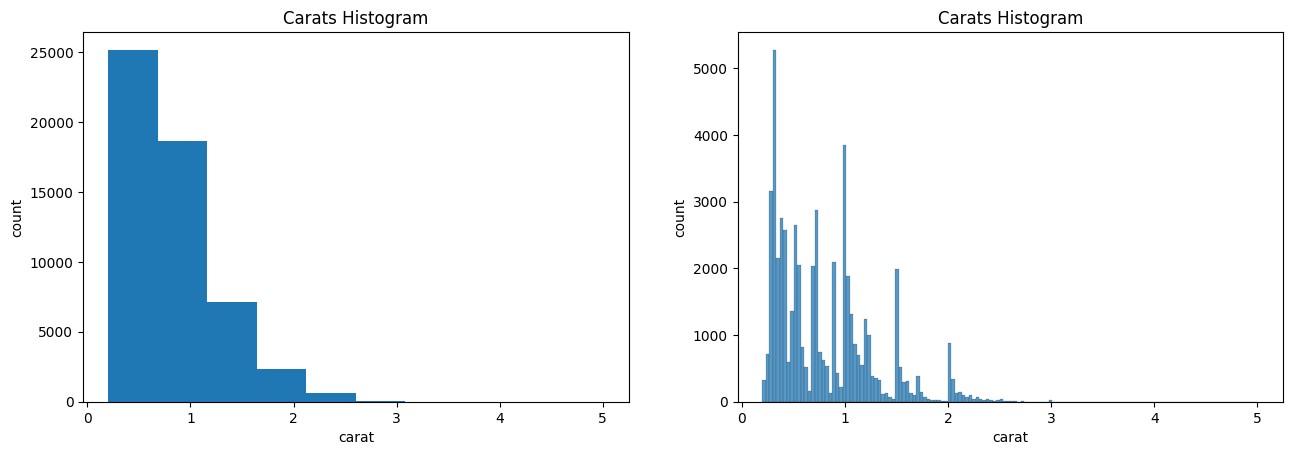

In [ ]:
plt.figure(1)
plt.subplot(121)
plt.hist(df['carat'])
plt.title("Carats Histogram")
plt.xlabel('carat')
plt.ylabel('count')
plt.subplot(122)
sns.histplot(x=df['carat'])
plt.title("Carats Histogram")
plt.ylabel('count')
plt.subplots_adjust(right=2)

From the generated histograms, we can see that the carat often falls in the lower end of the possible values which is in the size range of 0.2mm - 2mm. Also, the plot appears to be right skewed with the frequency count of carats decreasing drastically as the carat value increased up until around 2.5mm.

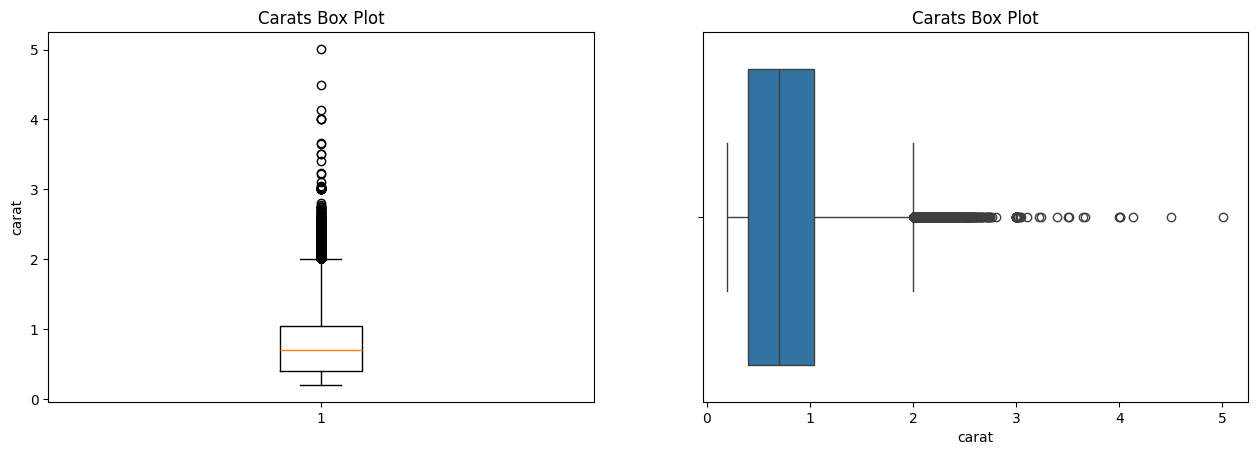

In [ ]:
plt.figure(1)
plt.subplot(121)
plt.boxplot(df['carat'])
plt.title("Carats Box Plot")
plt.ylabel('carat')
plt.subplot(122)
sns.boxplot(x=df['carat'])
plt.title("Carats Box Plot")
plt.subplots_adjust(right=2)

Based on the box plots, the outliers included values above 2mm.

### Cut

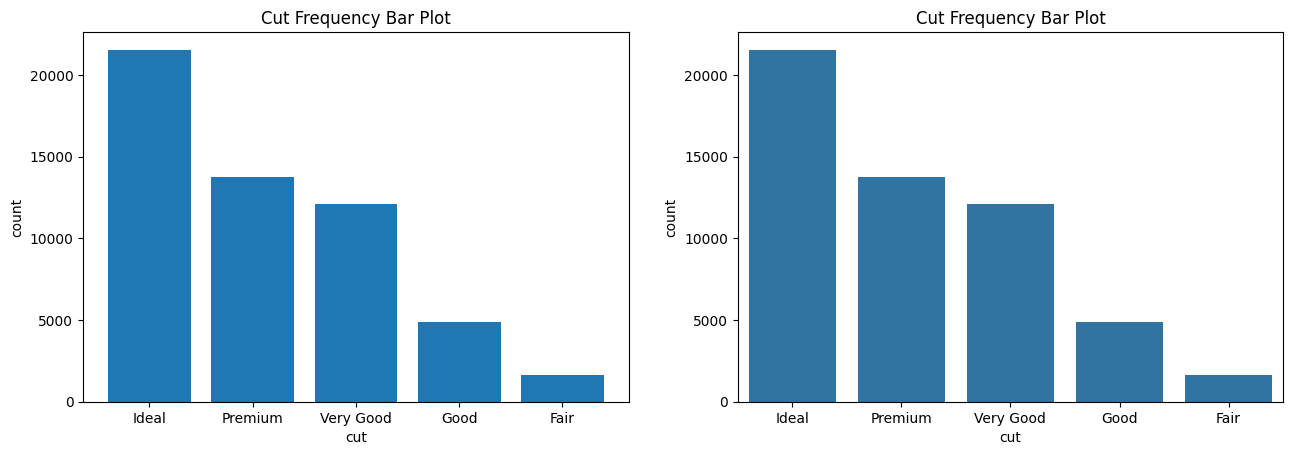

In [ ]:
cut_freq = df['cut'].value_counts().reset_index()
plt.figure(1)
plt.subplot(121)
plt.bar(cut_freq['cut'], cut_freq['count'])
plt.title("Cut Frequency Bar Plot")
plt.xlabel('cut')
plt.ylabel('count')
plt.subplot(122)
sns.barplot(x='cut', y='count', data=cut_freq)
plt.title("Cut Frequency Bar Plot")
plt.subplots_adjust(right=2)

The frequency bar plots indicate that quality of the diamonds generally fall under the higher quality end. The obvious outlier here in terms of the frequency count is the 'Fair' cut category.

### Color

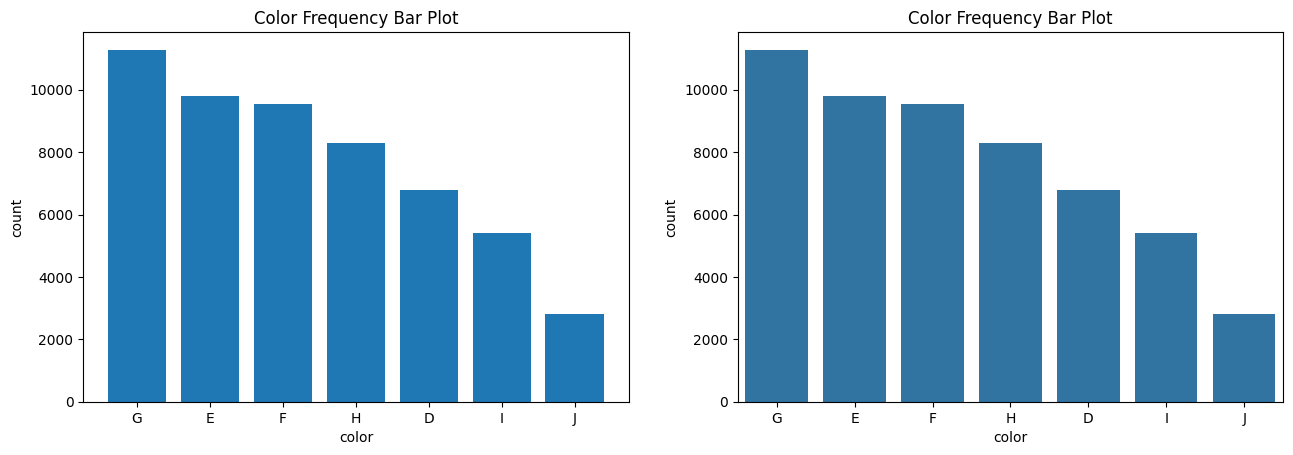

In [ ]:
color_freq = df['color'].value_counts().reset_index()
plt.figure(1)
plt.subplot(121)
plt.bar(color_freq['color'], color_freq['count'])
plt.title("Color Frequency Bar Plot")
plt.xlabel('color')
plt.ylabel('count')
plt.subplot(122)
sns.barplot(x='color', y='count', data=color_freq)
plt.title("Color Frequency Bar Plot")
plt.subplots_adjust(right=2)

Based on the frequency bar plots, we can see that the most frequent colors were those located alongside the border between 'colorless' and 'near colorless' when examining the color scale. The clear outlier here is the color rating 'J'.

### Clarity

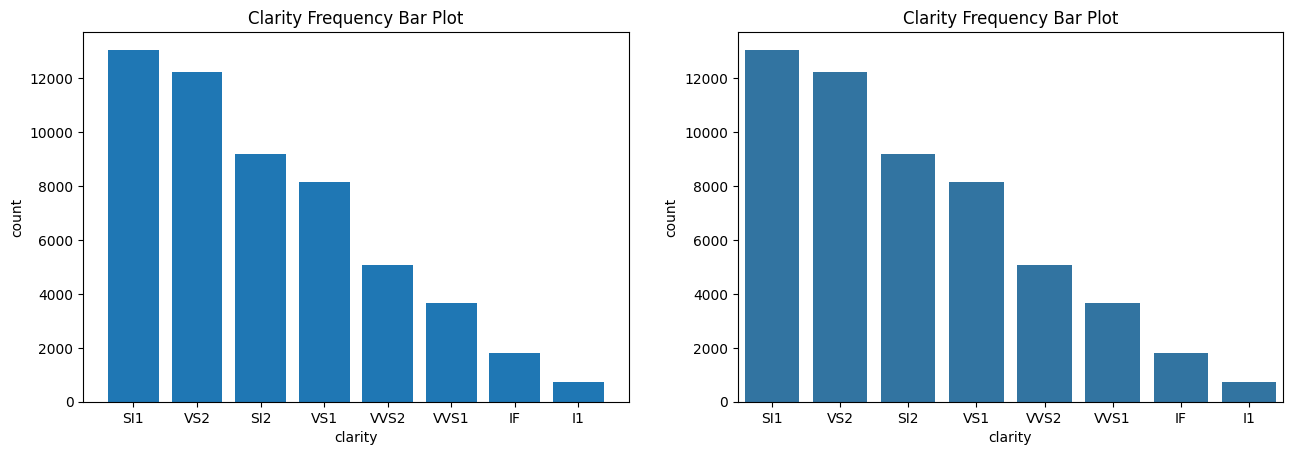

In [ ]:
clarity_freq = df['clarity'].value_counts().reset_index()
plt.figure(1)
plt.subplot(121)
plt.bar(clarity_freq['clarity'], clarity_freq['count'])
plt.title("Clarity Frequency Bar Plot")
plt.xlabel('clarity')
plt.ylabel('count')
plt.subplot(122)
sns.barplot(x='clarity', y='count', data=clarity_freq)
plt.title("Clarity Frequency Bar Plot")
plt.subplots_adjust(right=2)

Based on the bar plots, we can see that most of the clarity ratings fall within the middle of the range of possible ratings. The best and worst ratings are assigned significantly less when compared to the other ratings.

### Depth

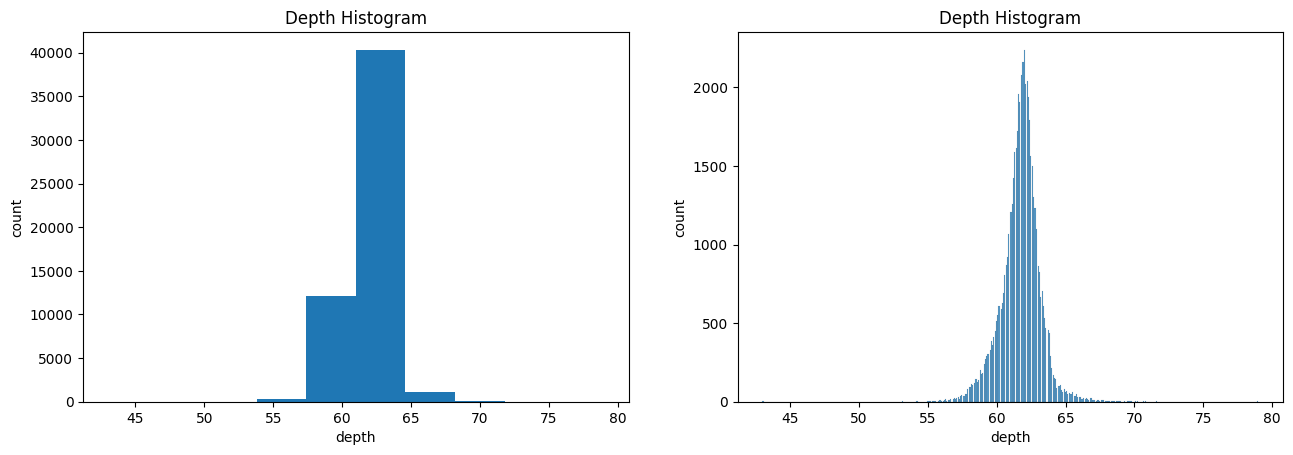

In [ ]:
plt.figure(1)
plt.subplot(121)
plt.hist(df['depth'])
plt.title("Depth Histogram")
plt.xlabel('depth')
plt.ylabel('count')
plt.subplot(122)
sns.histplot(x=df['depth'])
plt.title("Depth Histogram")
plt.ylabel('count')
plt.subplots_adjust(right=2)

Based on these histograms, most of the diamonds have a total depth percentage in the range of 58% - 64%.

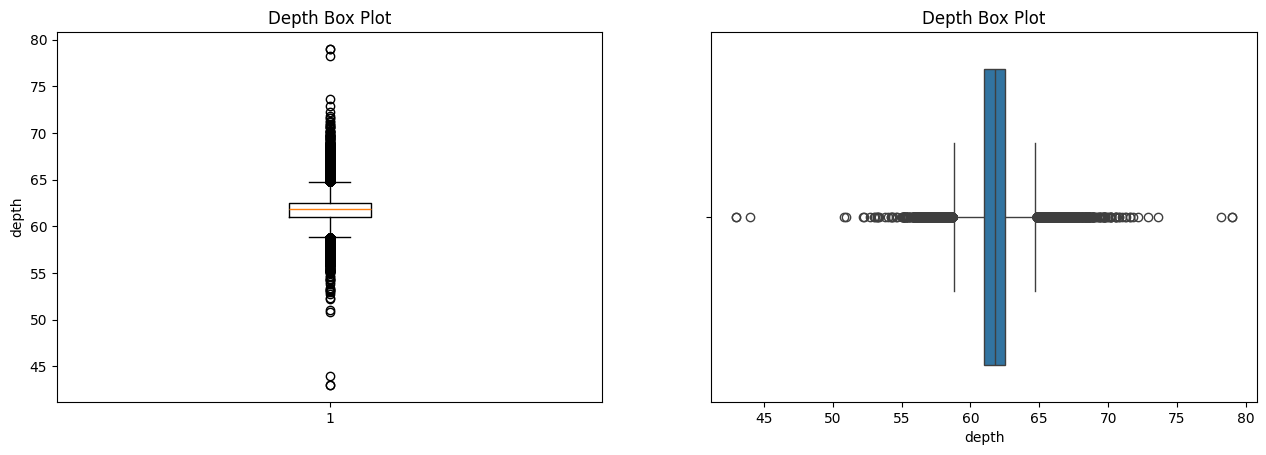

In [ ]:
plt.figure(1)
plt.subplot(121)
plt.boxplot(df['depth'])
plt.title("Depth Box Plot")
plt.ylabel('depth')
plt.subplot(122)
sns.boxplot(x=df['depth'])
plt.title("Depth Box Plot")
plt.subplots_adjust(right=2)

Based on the box plot, the outliers fall within the range of > 65% or < 58%.

### Table

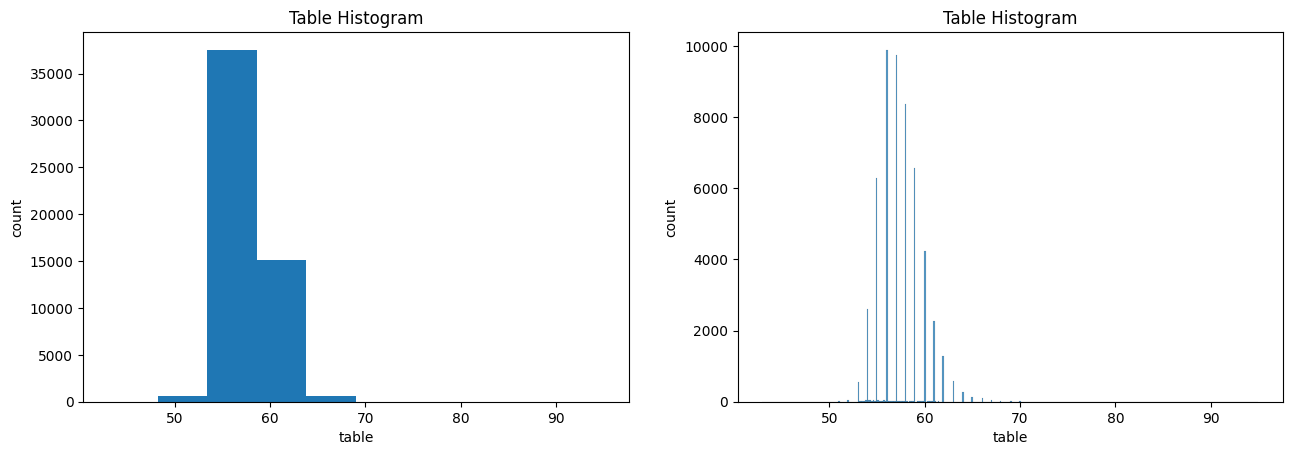

In [ ]:
plt.figure(1)
plt.subplot(121)
plt.hist(df['table'])
plt.title("Table Histogram")
plt.xlabel('table')
plt.ylabel('count')
plt.subplot(122)
sns.histplot(x=df['table'])
plt.title("Table Histogram")
plt.ylabel('count')
plt.subplots_adjust(right=2)

Based on the histograms, most of the table values fall within the range of 53 and 62. Despite the values being upper bounded at 95, there were only a few table values greater than 65.

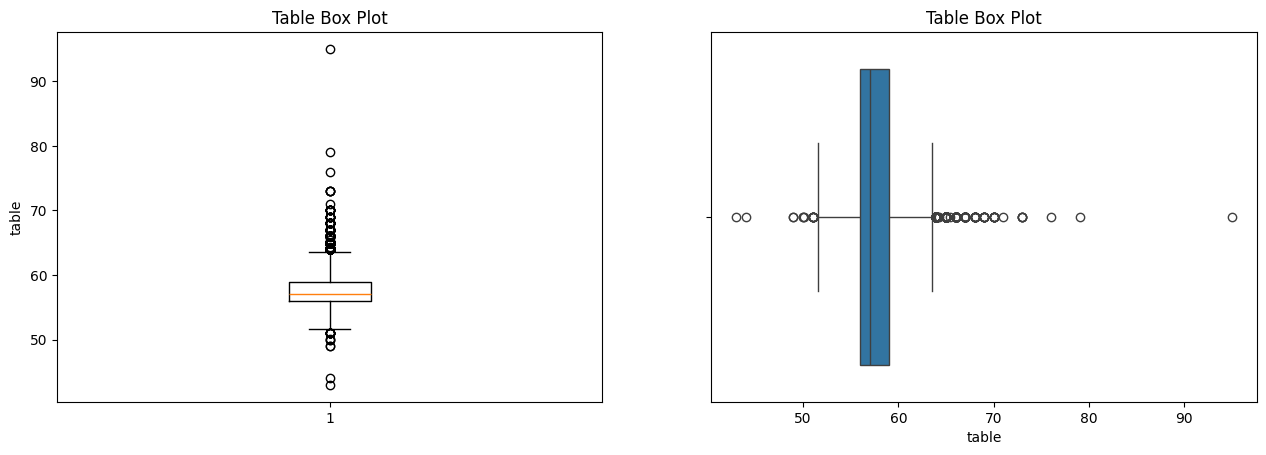

In [ ]:
plt.figure(1)
plt.subplot(121)
plt.boxplot(df['table'])
plt.title("Table Box Plot")
plt.ylabel('table')
plt.subplot(122)
sns.boxplot(x=df['table'])
plt.title("Table Box Plot")
plt.subplots_adjust(right=2)

Based on the box plots, a majority of the outliers fall within the range of < 53 or > 63.

### Price

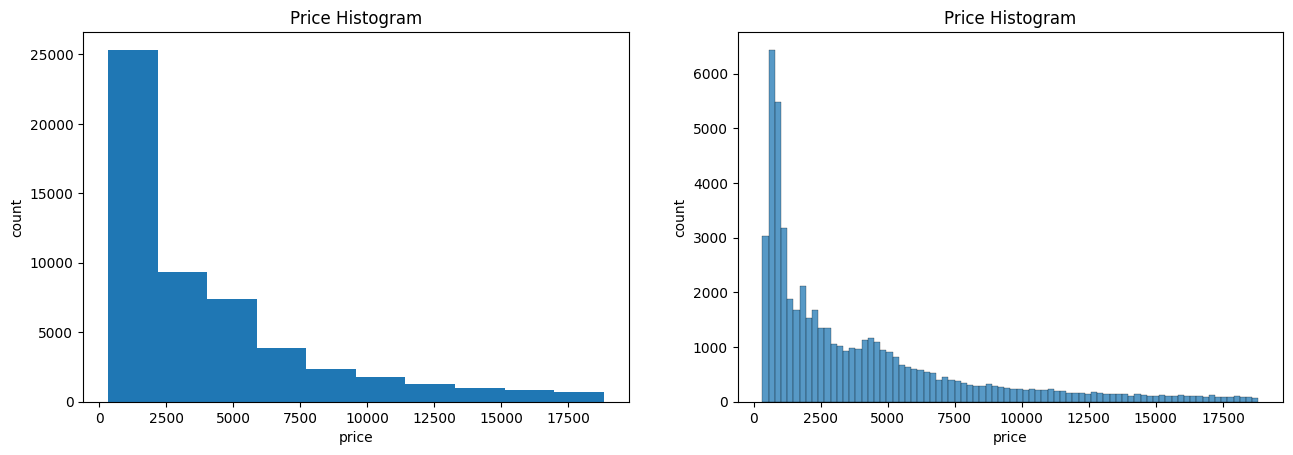

In [ ]:
plt.figure(1)
plt.subplot(121)
plt.hist(df['price'])
plt.title("Price Histogram")
plt.xlabel('price')
plt.ylabel('count')
plt.subplot(122)
sns.histplot(x=df['price'])
plt.title("Price Histogram")
plt.ylabel('count')
plt.subplots_adjust(right=2)

Based on the histograms, most diamonds were priced at relatively low prices since the plot is right skewed.

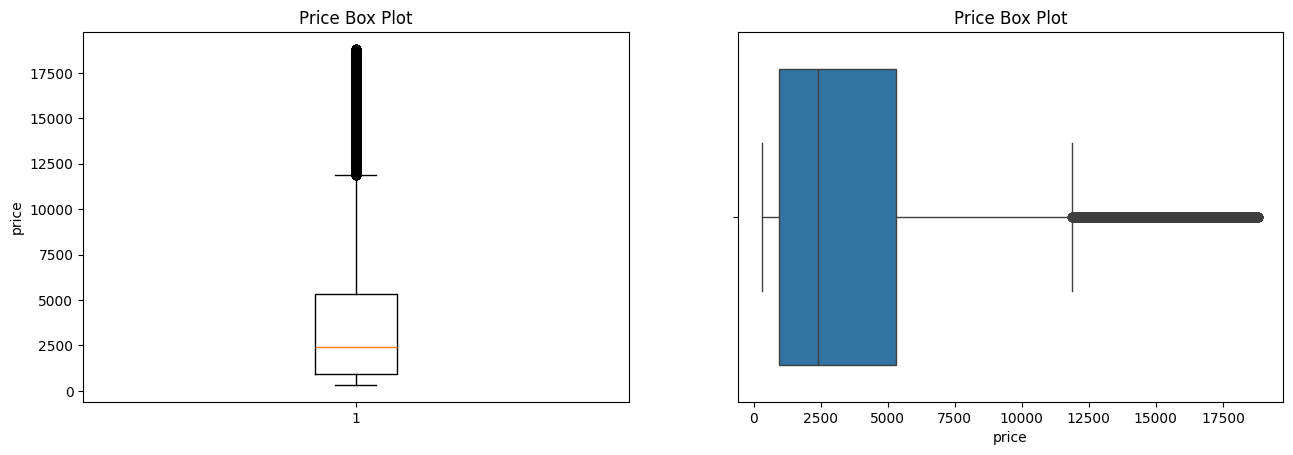

In [ ]:
plt.figure(1)
plt.subplot(121)
plt.boxplot(df['price'])
plt.title("Price Box Plot")
plt.ylabel('price')
plt.subplot(122)
sns.boxplot(x=df['price'])
plt.title("Price Box Plot")
plt.subplots_adjust(right=2)

Based on the box plots, all the outliers appear to be within the range of > 12000.

### Dimension x

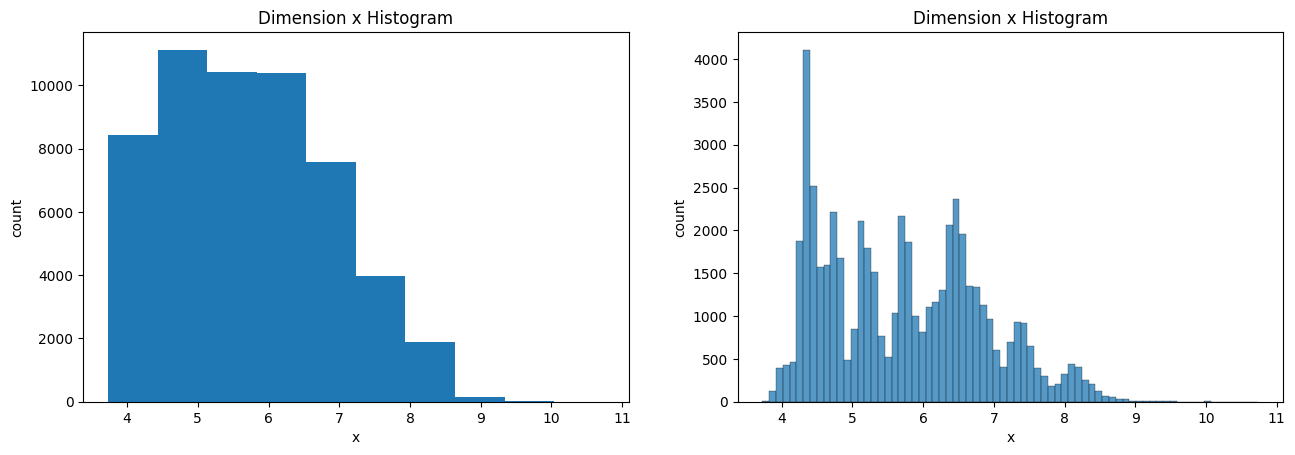

In [ ]:
plt.figure(1)
plt.subplot(121)
plt.hist(df['x'])
plt.title("Dimension x Histogram")
plt.xlabel('x')
plt.ylabel('count')
plt.subplot(122)
sns.histplot(x=df['x'])
plt.title("Dimension x Histogram")
plt.ylabel('count')
plt.subplots_adjust(right=2)

Based on the histograms, the length of the diamonds generally fall within the range of 4 < x < 7. However, there's a good representation of most of the possible values for the length.

### Dimension y

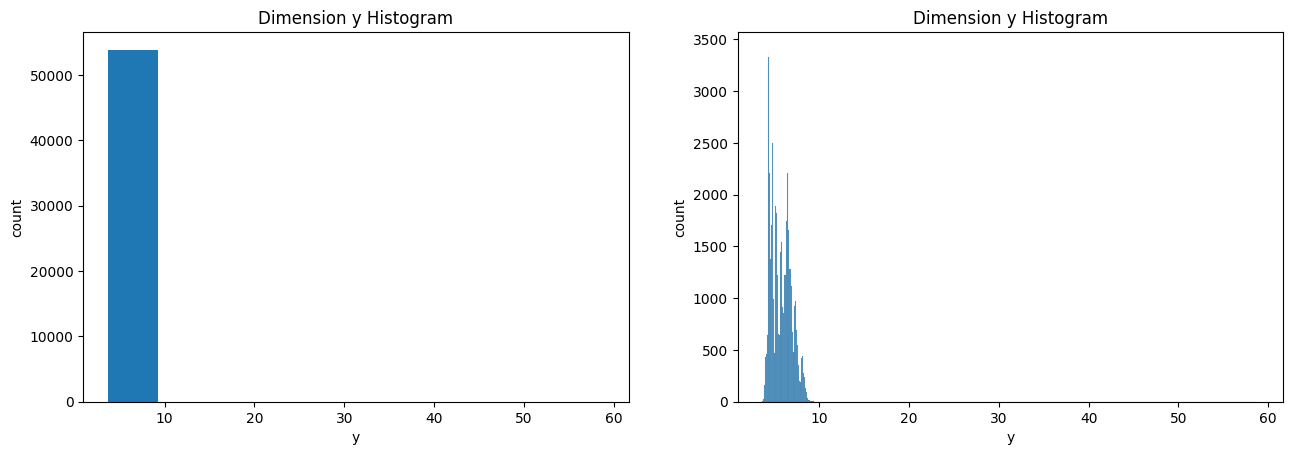

In [ ]:
plt.figure(1)
plt.subplot(121)
plt.hist(df['y'])
plt.title("Dimension y Histogram")
plt.xlabel('y')
plt.ylabel('count')
plt.subplot(122)
sns.histplot(x=df['y'])
plt.title("Dimension y Histogram")
plt.ylabel('count')
plt.subplots_adjust(right=2)

Based on the histograms, almost all of the width values fell within the range of 3 < y < 9. There are only a few set of values that fell on the higher end side.

### Dimension z

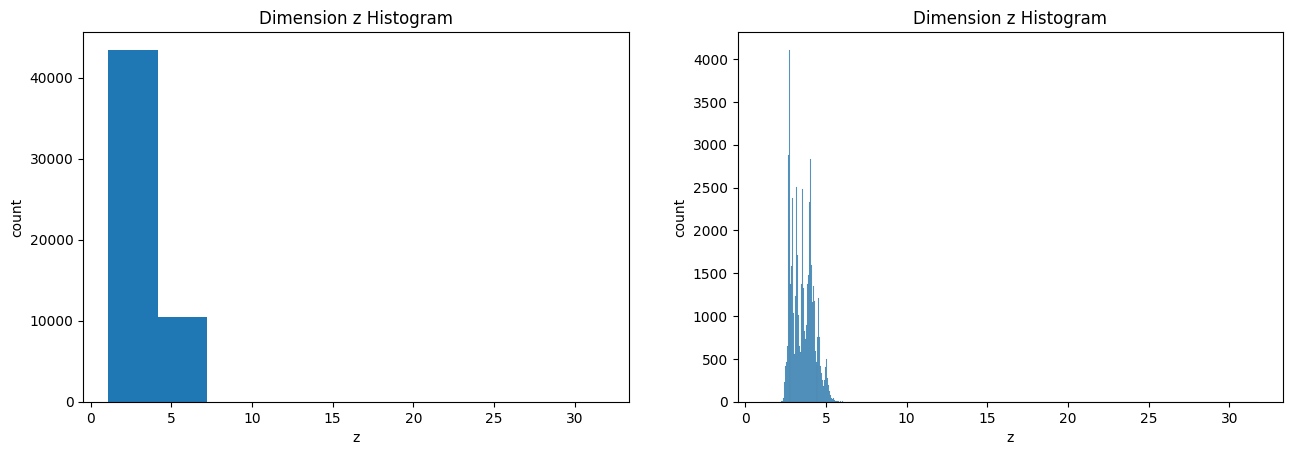

In [ ]:
plt.figure(1)
plt.subplot(121)
plt.hist(df['z'])
plt.title("Dimension z Histogram")
plt.xlabel('z')
plt.ylabel('count')
plt.subplot(122)
sns.histplot(x=df['z'])
plt.title("Dimension z Histogram")
plt.ylabel('count')
plt.subplots_adjust(right=2)

Based on the histograms, the vast majority of the depth values fall within the range of 2 < z < 7. Similar to the plot for dimension y, only a few values appear on the higher end side.

## Inferences

### What proportion of diamonds are between .30 and 1.08 carats?

In [ ]:
prop = len(df[(0.3 < df['carat']) & (df['carat'] < 1.08)]) / df.shape[0]
print(f'The percentage of diamonds having a carats value between 0.30 and 1.08 (exclusive) is: {prop:.4%}')
print(f'Proportion: {prop}')

The percentage of diamonds having a carats value between 0.30 and 1.08 (exclusive) is: 69.4121%
Proportion: 0.6941209198813056


We first have to search for all diamonds (rows) within the data frame, that has a carat value within the range of 0.30 and 1.08 (exclusive). Once we find this, we compute the total number of rows that satisfy the specified condition and then divide that by the total number of rows in the original dataframe. This gives us the proportion.

###  How many of the diamonds have equal x and y dimensions?

In [ ]:
count = len(df[df['x'] == df['y']])
print(f'There are {count} diamonds having equal x and y dimensions')

There are 10 diamonds having equal x and y dimensions


We first search for all the diamonds (rows) having x and y dimensions that share the same value. We take the length of this to determine the total number of diamonds (rows) that satisfied the condition.

### How many of the diamonds have a carat value that is less than the mean carat value?

In [ ]:
carat_mean = np.mean(df['carat'])
count = len(df[df['carat'] < carat_mean])
print(f'There are {count} diamonds that have a carat value that is less than the carat mean {carat_mean}')

There are 31125 diamonds that have a carat value that is less than the carat mean 0.7976982566765577


We first compute the mean carat value using numpy. Once computed, we search for all diamonds (rows) having a carat value that is strictly less than the carat mean. Once we found all the rows, we take the length of it to determine the total number of rows that satisfied the condition, giving us the answer.

### How many diamonds have a Premium cut or better? Note that the possible values for the quality of a cut are ranked in ascending order as follows: Fair / Good / Very Good / Premium / Ideal

In [ ]:
great_cuts_count = len(df[(df['cut'] == 'Premium') | (df['cut'] == 'Ideal')])
print(f'There are {great_cuts_count} diamonds having a premium cut or better')

There are 35328 diamonds having a premium cut or better


We first search for all the diamonds (rows) that have a cut value of either Premium or Ideal. We compute the total number of rows that satisfy the condition, giving the answer.

### Which diamond has the highest price per carat? What is its value?

In [ ]:
price_per_carat = df['price'] / df['carat']
max_index = price_per_carat.idxmax()
highest_price_per_carat_diamond = df.loc[max_index]
val = highest_price_per_carat_diamond['price'] / highest_price_per_carat_diamond['carat']
print(f'Diamond {max_index} has the highest price per carat with a value of ${val:,.2f}')

Diamond 27635 has the highest price per carat with a value of $17,828.85


We first construct a different data frame having only a column consisting of the price per carat values. From here, we compute the index having the max price per carat value within this data frame. Then, we locate the diamond (row) in the original data frame that has the highest price per carat diamond using the index that we previously computed. We then print the diamond index number along with its price per carat value formatted appropriately.

### Using both Matplolib and Seaborn, make boxplots of the diamond price for each distinct cut value and discuss any conclusions you can draw from the appearance of the boxplots.

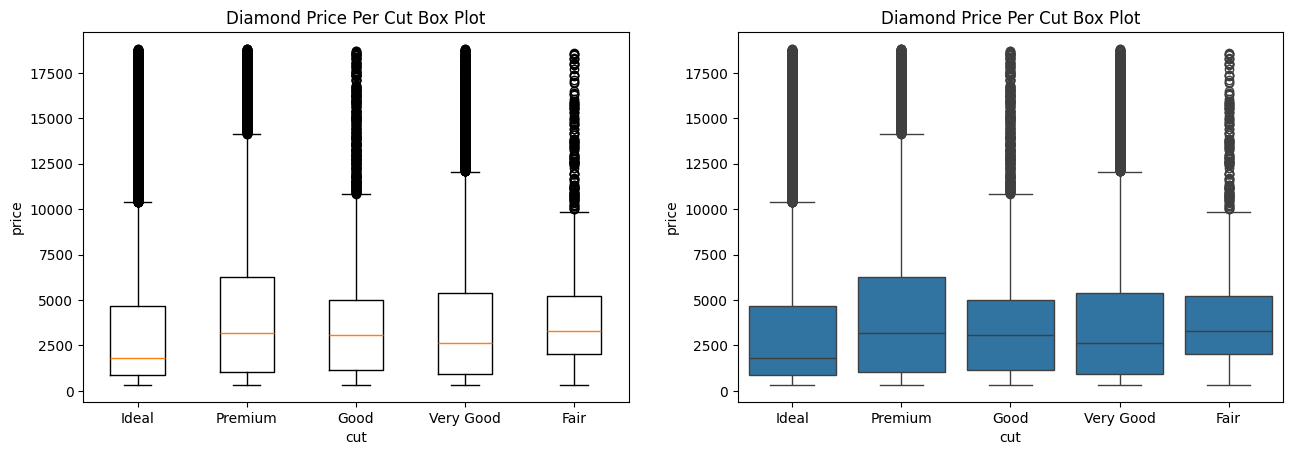

In [ ]:
plt.figure(1)
plt.subplot(121)
unique_cuts = df['cut'].unique()
diamond_price_per_cut = [df[df['cut'] == cut]['price'] for cut in unique_cuts]
plt.boxplot(diamond_price_per_cut, tick_labels=unique_cuts)
plt.title('Diamond Price Per Cut Box Plot')
plt.xlabel('cut')
plt.ylabel('price')
plt.subplot(122)
sns.boxplot(x='cut', y='price', data=df)
plt.title('Diamond Price Per Cut Box Plot')
plt.subplots_adjust(right=2)

To construct the box plot using matplotlib, I first computed the unique cuts within the data frame. Then, I used list comprehension, to iterate through each unique cut and for each current cut, I fetched all the rows that matched the current cut and extracted the prices for all the rows that matched. From here, I passed the data generated into the construction of the box plot along with its labels. To construct the box plot using seaborn, I simply called sns.boxplot and specified the x and y arguments to properly structure the plot to be cut by price.

Based on the plots, it's clear that the premium cut has the max price and covers a larger range of values within Q1 - Q3. It's also evident the majority of the outliers fall within the range of > 10000. Additionally, each cut's median generally falls within the same range of values despite them being distinct cuts.

### Using both Matplolib and Seaborn, make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?

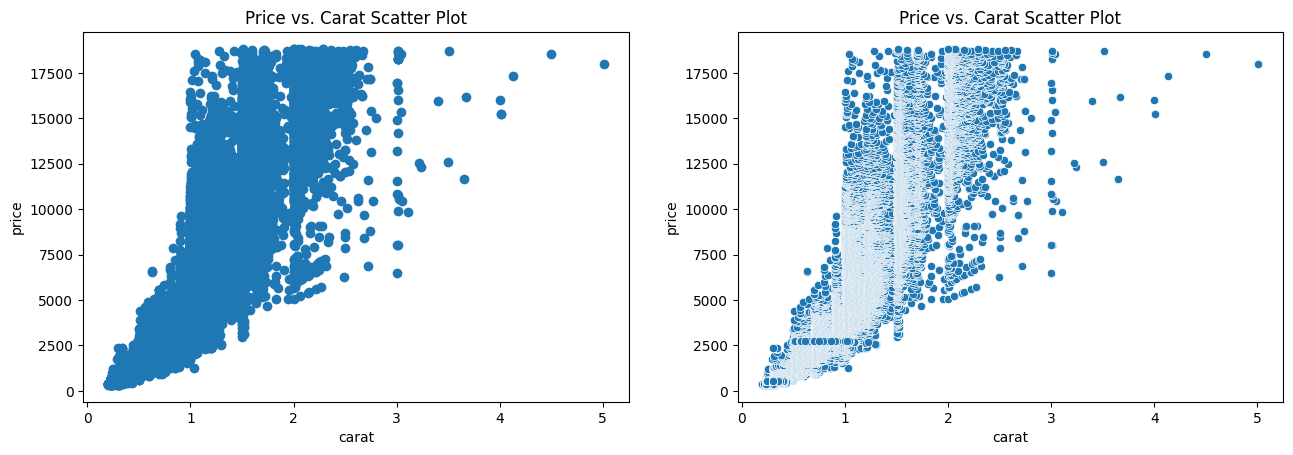

In [ ]:
plt.figure(1)
plt.subplot(121)
plt.scatter(df['carat'], df['price'])
plt.title('Price vs. Carat Scatter Plot')
plt.xlabel('carat')
plt.ylabel('price')
plt.subplot(122)
sns.scatterplot(x='carat', y='price', data=df)
plt.title('Price vs. Carat Scatter Plot')
plt.subplots_adjust(right=2)

To construct both plots, we specify the x and y arguments properly when invoking the scatter plot method so that it's carat by price.

Based on the plots, it's clear that having a very high carat value isn't the sole requirement for achieving a high price. There were many low level to mid level value carats that were able to achieve a pretty high price. However, the majority of the low priced diamonds were due to having a low carat while having a higher carat diamond usually ensured a higher price. Also, it's clear that the most common carat value is within the range of 0.2mm - 2.5mm.

## Conclusion

Based on our observations and analysis, there were multiple attributes that were influential to the diamond's price and the price didn't simply depend on any single attribute. For instance, having a higher quality cut and in most cases the 'Premium' cut often led to higher prices. Additionally, having a higher carat value would likely gurantee a high level price. However, we were also able to note that were cases where having an 'normal' rating for any of the categorical attributes would still yield a high level price. This was the case when we constructed the price vs carat plot and saw that there cases where a common carat value was able to yield a high level price, proving that the diamond's price wasn't really solely dependent on a single variable and that it likely had yielded a high level price due to the influence of the other variables. Additionally, most numerical variables including carat, depth, and table were shown to fall within relatively tight ranges, implying limited variability among certain variables.

## References

- "Ideal Diamond Depth and Table by Cut." *The Diamond Pro*, www.diamonds.pro/education/diamond-depth-and-table/.
- "Diamond Quality Factors." *Gia.edu*, 2014, www.gia.edu/diamond-quality-factor.
- "Prices of over 50,000 Round Cut Diamonds - Diamonds." *Tidyverse.org*, 2025, ggplot2.tidyverse.org/reference/diamonds.html#ref-usage. Accessed 11 June 2025.
- "Boxplot Using Seaborn in Python." *GeeksforGeeks*, 25 June 2020, www.geeksforgeeks.org/boxplot-using-seaborn-in-python/.